## Description

### Project Statement: 

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level. 

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period. 

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to 

1. Perform data quality check by checking for missing values if any. 

2. Understand what factors contributed most to employee turnover by EDA. 

3. Perform clustering of Employees who left based on their satisfaction and evaluation. 

4. Handle the left Class Imbalance using SMOTE technique. 

5. Perform k-fold cross-validation model training and evaluate performance.  

6. Identify the best model and justify the evaluation metrics used.  

7. Suggest various retention strategies for targeted employees. 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('1673873196_hr_comma_sep.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# checking for the null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Since there was no null values in the data so there was no need of cleaning the data

# EDA

<AxesSubplot:>

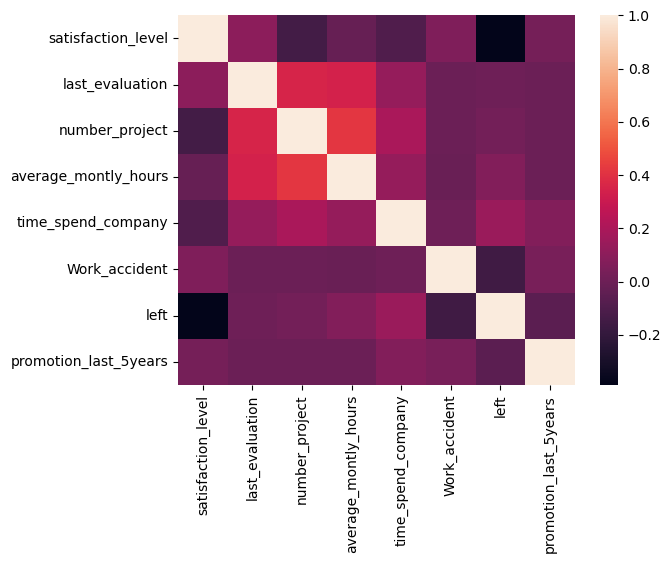

In [5]:
# finding the factors which contribute most to employee turnover
# plotting a heatmap to see the features which affect the employee turnover
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

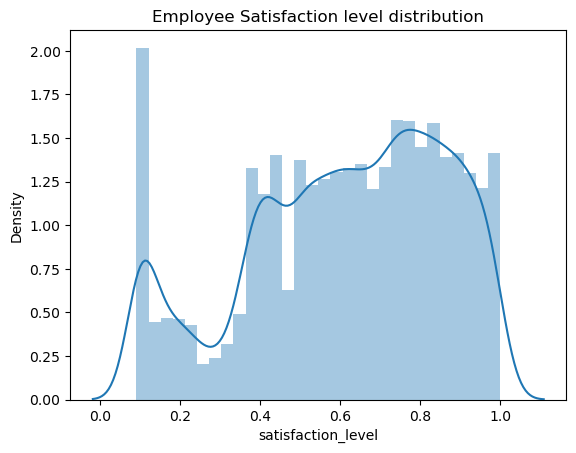

In [6]:
# plotting distribution plot to show the employee satisfaction
sns.distplot(df.satisfaction_level, hist=True)
plt.title('Employee Satisfaction level distribution')
plt.show()

In [7]:
df['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

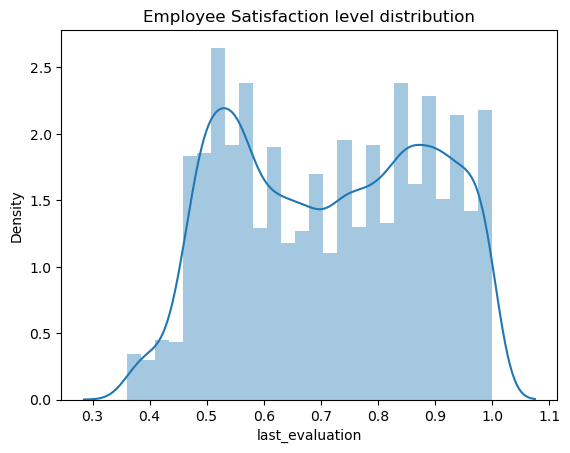

In [8]:
# distribution for employee evaluation
# plotting distribution plot to show the employee satisfaction
sns.distplot(df.last_evaluation, hist=True)
plt.title('Employee Satisfaction level distribution')
plt.show()

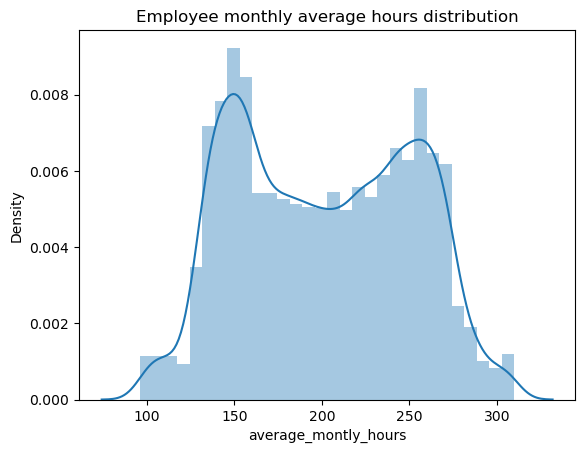

In [9]:
# employee average monthly hours
sns.distplot(df.average_montly_hours, hist=True)
plt.title('Employee monthly average hours distribution')
plt.show()

In [10]:
# plotting employee project count
number_project=df['number_project'].value_counts()
number_project

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

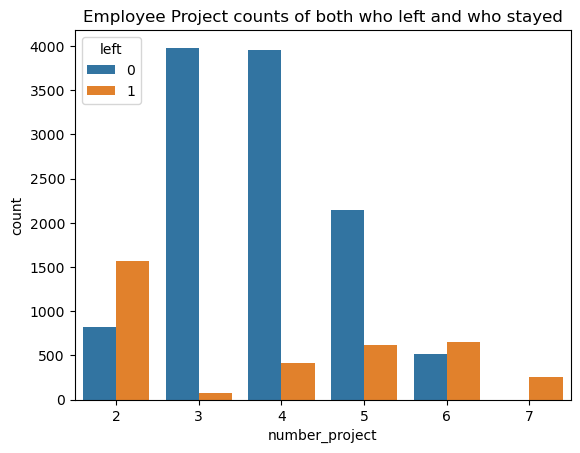

In [11]:
sns.countplot(x='number_project',hue='left', data=df)
plt.title('Employee Project counts of both who left and who stayed')
plt.show()

From the above barplot we can say that:

    1. The count of number projects done by employee who are still in the company are more than the ones who have left the company excepts some.
    2. Employee who have done 2,6 and 7 number of projects are more in numbers where as the employee who have done 7 number projects all of the employee has left the company.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
# clustering based on the employee satisfaction
filtered_data=df[['satisfaction_level','last_evaluation','left']]
filtered_data=filtered_data[filtered_data['left']==1]
filtered_data

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [14]:
X=filtered_data.iloc[:,[0,1]].values
X

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [15]:
from sklearn.cluster import KMeans


In [16]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [17]:
pred_kmeans=kmeans.fit_predict(X)

In [18]:
filtered_data['Clusters']=pred_kmeans

In [19]:
filtered_data.head()

,satisfaction_level,last_evaluation,left,Clusters
0,0.38,0.53,1,0
1,0.80,0.86,1,1
2,0.11,0.88,1,2
3,0.72,0.87,1,1
4,0.37,0.52,1,0


In [20]:
filtered_data['Clusters'].value_counts()

0    1650
1     977
2     944
Name: Clusters, dtype: int64

In [21]:
len(pred_kmeans)

3571

In [22]:
filtered_data.columns

Index(['satisfaction_level', 'last_evaluation', 'left', 'Clusters'], dtype='object')

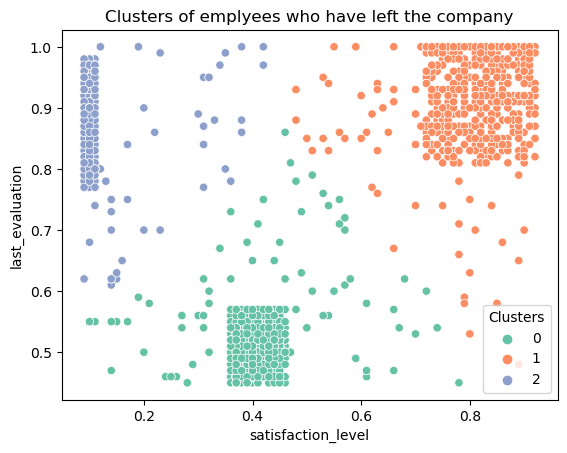

In [23]:
sns.scatterplot(x='satisfaction_level',y='last_evaluation', hue='Clusters', data=filtered_data,palette='Set2')
plt.title('Clusters of emplyees who have left the company')
plt.show()

Based on the satisfaction and evaluation factors there are few employee who has left the company because they are not satisfied but their evaluation was close to 1.

There are employees too whose satisfaction level was around 0.5 and evaluation score was too around 0.5  and they left the company.

And there are more number of employees who left the company being fully satisfied and with the evaluation close to 1.

There are others factors why the employees left the company some of the common reasons mights be they got good offers from other company some reasons might be due work culture. But by visualizing the satisfaction level there are employee who has left the company as they were not satisfied. T

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
# converting the sales and salary data types to numeric using the pandas get_dummies function
df['sales'].value_counts()

df=pd.get_dummies(df, prefix=['sales','salary'])

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Since all the features are in numeric form there was no need of converting the categorical feature to numeric 

# Splitting the dataset into train and test set

In [27]:
# splitting the data into X and y where x is the independent variables and y is dependent variable
X=df.drop('left', axis=1)
y=df['left']

In [28]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
# importing the necessary sklearn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [45]:
# splitting the data into train and test sets
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [46]:
X_train.shape

(11999, 20)

In [47]:
y_train.shape

(11999,)

In [48]:
models={
    'Logistics Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

In [81]:
# function to fit and evaluate the models
def fit_evaluate(models, X, y, X_train,X_test, y_train, y_test):
    model_scores=[]
    num_fold=5
    kf=KFold(n_splits=num_fold, shuffle=True, random_state=42)
    
    test_df=pd.DataFrame({'Actual':y_test})
    counter=1
    
    for name, model in models.items():
#         fit the model
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        
#         printing the model result
        print(f"Evaluating {name}........")
        model_classification_report=classification_report(y_test, y_pred,output_dict=True)
        print(model_classification_report)
        
#         cross validating the model using 5 fold cross validation
        cross_valid_result=cross_val_score(model, X,y,cv=kf)
        print(f'Cross-Validation Results (Accuracy) for {name}: {cross_valid_result}')
        print(f'Mean Accuracy for {name} is {cross_valid_result.mean()} with a standard deviation of {cross_valid_result.std()}')
        print('\n')
        
#       predicting the probability for each model to find the ROC/AUC and plot the ROC Curve
        y_pred_proba=model.predict_proba(X_test)[:,1]
        
        test_df.insert(counter, name, y_pred_proba)
        
#         increase the counter to insert the result of other models in the dataframe
        counter=counter+1
    
    
#     plotting confusion matrix
        conf_matrix=confusion_matrix(y_test,y_pred)
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

#         saving the model result in the dictionary
        precision_0 = model_classification_report['0']['precision']
        recall_0 = model_classification_report['0']['recall']
        f1_0 = model_classification_report['0']['f1-score']
        
        precision_1 = model_classification_report['1']['precision']
        recall_1 = model_classification_report['1']['recall']
        f1_1 = model_classification_report['1']['f1-score']

        model_scores.append({
            'Model': name,
            'Precision_0': precision_0,
            'Recall_0': recall_0,
            'F1_0': f1_0,
            'Precision_1': precision_1,
            'Recall_1': recall_1,
            'F1_1': f1_1
        })
    return model_scores, test_df
        
        

Evaluating Logistics Regression........
{'0': {'precision': 0.8140952380952381, 'recall': 0.9327804452204278, 'f1-score': 0.8694060211554109, 'support': 2291}, '1': {'precision': 0.5893333333333334, 'recall': 0.31170662905500707, 'f1-score': 0.4077490774907749, 'support': 709}, 'accuracy': 0.786, 'macro avg': {'precision': 0.7017142857142857, 'recall': 0.6222435371377174, 'f1-score': 0.6385775493230929, 'support': 3000}, 'weighted avg': {'precision': 0.760976507936508, 'recall': 0.786, 'f1-score': 0.7603010968026687, 'support': 3000}}
Cross-Validation Results (Accuracy) for Logistics Regression: [0.78566667 0.798      0.795      0.802      0.78792931]
Mean Accuracy for Logistics Regression is 0.7937191952873179 with a standard deviation of 0.006113975267870707




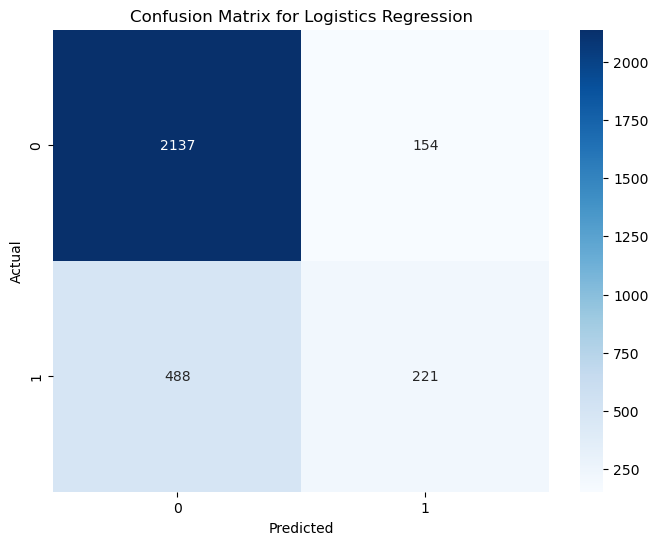

Evaluating Random Forest Classifier........
{'0': {'precision': 0.9930434782608696, 'recall': 0.9969445656918376, 'f1-score': 0.9949901982138969, 'support': 2291}, '1': {'precision': 0.99, 'recall': 0.9774330042313117, 'f1-score': 0.9836763662171754, 'support': 709}, 'accuracy': 0.9923333333333333, 'macro avg': {'precision': 0.9915217391304347, 'recall': 0.9871887849615747, 'f1-score': 0.9893332822155361, 'support': 3000}, 'weighted avg': {'precision': 0.9923242028985507, 'recall': 0.9923333333333333, 'f1-score': 0.9923163625853384, 'support': 3000}}
Cross-Validation Results (Accuracy) for Random Forest Classifier: [0.988      0.991      0.99066667 0.991      0.99333111]
Mean Accuracy for Random Forest Classifier is 0.9907995554073581 with a standard deviation of 0.0016937707339076701




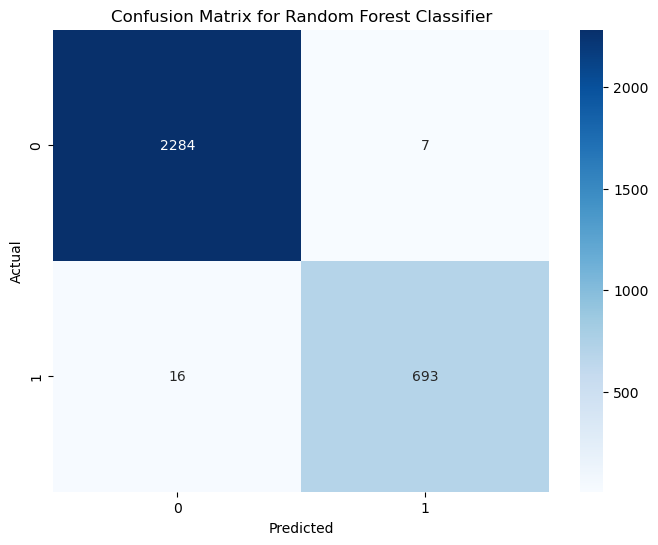

Evaluating Gradient Boosting Classifier........
{'0': {'precision': 0.9792566983578219, 'recall': 0.9890877346137058, 'f1-score': 0.9841476655808903, 'support': 2291}, '1': {'precision': 0.9635568513119533, 'recall': 0.9322990126939351, 'f1-score': 0.9476702508960574, 'support': 709}, 'accuracy': 0.9756666666666667, 'macro avg': {'precision': 0.9714067748348876, 'recall': 0.9606933736538205, 'f1-score': 0.9659089582384739, 'support': 3000}, 'weighted avg': {'precision': 0.9755463011726483, 'recall': 0.9756666666666667, 'f1-score': 0.9755268365770413, 'support': 3000}}
Cross-Validation Results (Accuracy) for Gradient Boosting Classifier: [0.97366667 0.97366667 0.97766667 0.97666667 0.98032678]
Mean Accuracy for Gradient Boosting Classifier is 0.9763986884517062 with a standard deviation of 0.002531297522056299




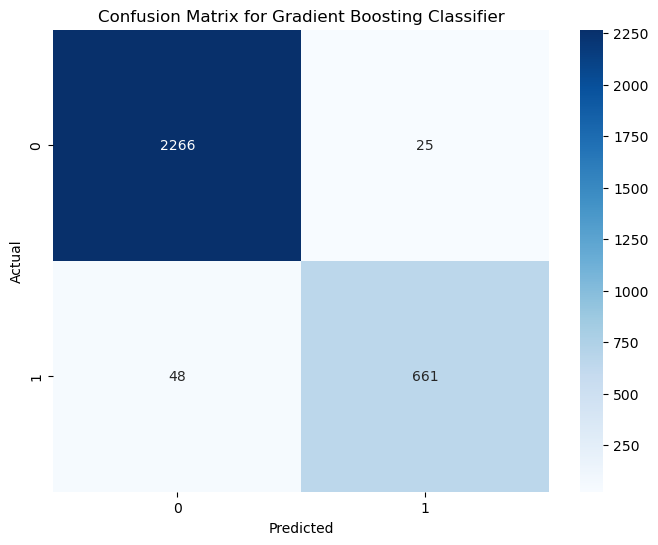

In [82]:
model_scores, test_df=fit_evaluate(models=models,X=X,y=y, X_train=X_train,X_test=X_test,y_train=y_train ,y_test=y_test)

In [83]:
test_df

,Actual,Logistics Regression,Random Forest Classifier,Gradient Boosting Classifier
6958,0,0.040851,0.00,0.007980
7534,0,0.051343,0.01,0.016010
2975,0,0.064476,0.00,0.005059
3903,0,0.158011,0.15,0.010309
8437,0,0.082678,0.00,0.004808
...,...,...,...,...
1229,1,0.485192,1.00,0.966826
10593,0,0.023941,0.00,0.008230
12248,1,0.212771,0.98,0.838045
3147,0,0.206797,0.00,0.011436


In [84]:
test_df

,Actual,Logistics Regression,Random Forest Classifier,Gradient Boosting Classifier
6958,0,0.040851,0.00,0.007980
7534,0,0.051343,0.01,0.016010
2975,0,0.064476,0.00,0.005059
3903,0,0.158011,0.15,0.010309
8437,0,0.082678,0.00,0.004808
...,...,...,...,...
1229,1,0.485192,1.00,0.966826
10593,0,0.023941,0.00,0.008230
12248,1,0.212771,0.98,0.838045
3147,0,0.206797,0.00,0.011436


In [87]:
model_scores=pd.DataFrame(model_scores)
model_scores

,Model,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Logistics Regression,0.814095,0.932780,0.869406,0.589333,0.311707,0.407749
1,Random Forest Classifier,0.993043,0.996945,0.994990,0.990000,0.977433,0.983676
2,Gradient Boosting Classifier,0.979257,0.989088,0.984148,0.963557,0.932299,0.947670


For the evaluatio of the model I have chosen Precision, recall, and F1 score. Since the problem statement is a classification problem so i decided to use these evaluation metrices. Another reason is that they procide a more comprehensive understanding of a model performance beyond simple accuracy.

#### Now let's decide the best model among these three model
By looking the precision recall and f1-score result of all three model we can conlcude that Random Forest Classifier seems to have high precision, recall and F1-Scores for both classes. Gradient Boosting classifier seems to have a good precision, recall and f1-score which can be a second option after random forest classifier.

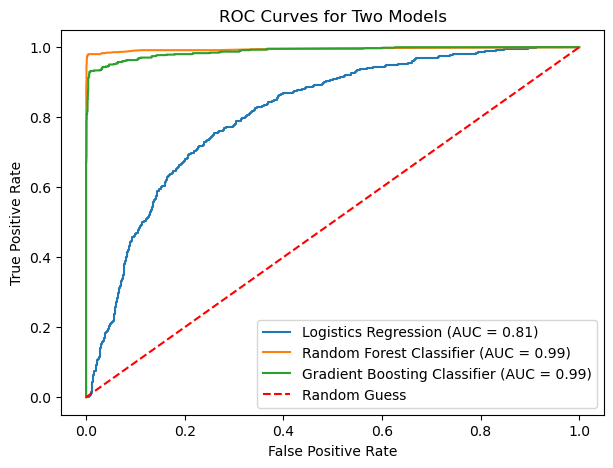

In [68]:
# Plot ROC curve for each model
plt.figure(figsize=(7, 5))
 
for model in ['Logistics Regression','Random Forest Classifier','Gradient Boosting Classifier']:
    fpr, tpr, _ = roc_curve(test_df['Actual'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

In [54]:
test_df

,Actual,Logistics Regression,Random Forest Classifier,Gradient Boosting Classifier
6958,0,0.040851,0.02,0.007980
7534,0,0.051343,0.00,0.016010
2975,0,0.064476,0.00,0.005059
3903,0,0.158011,0.15,0.010309
8437,0,0.082678,0.00,0.004808
...,...,...,...,...
1229,1,0.485192,1.00,0.966826
10593,0,0.023941,0.00,0.008230
12248,1,0.212771,0.98,0.838045
3147,0,0.206797,0.00,0.011436


Since Random Forest classifier is performing good in compare to other model taking only the random forest value to categorize the employees based on the predicted employees turnover

In [55]:
random_forest_result=test_df[['Actual','Random Forest Classifier']]

In [56]:
random_forest_result

,Actual,Random Forest Classifier
6958,0,0.02
7534,0,0.00
2975,0,0.00
3903,0,0.15
8437,0,0.00
...,...,...
1229,1,1.00
10593,0,0.00
12248,1,0.98
3147,0,0.00


# function to categorize the employee into four zones
■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)

■	Medium Risk Zone (Orange) (60% < Score < 90%)

■	High Risk Zone (Red) (Score > 90%).


In [57]:
def categorize_employee(value):
    if value<0.2:
        return 'Safe Zone (Green)'
    elif 0.2<value<0.6:
        return 'Low Risk Zone (Yellow)'
    elif 0.6<value<0.9:
        return 'Medium Risk Zone (Orange)'
    elif value>0.9:
        return 'High Risk Zone (Red)'

In [58]:
random_forest_result['predicted_category']=random_forest_result['Random Forest Classifier'].apply(categorize_employee)

In [59]:
random_forest_result

,Actual,Random Forest Classifier,predicted_category
6958,0,0.02,Safe Zone (Green)
7534,0,0.00,Safe Zone (Green)
2975,0,0.00,Safe Zone (Green)
3903,0,0.15,Safe Zone (Green)
8437,0,0.00,Safe Zone (Green)
...,...,...,...
1229,1,1.00,High Risk Zone (Red)
10593,0,0.00,Safe Zone (Green)
12248,1,0.98,High Risk Zone (Red)
3147,0,0.00,Safe Zone (Green)


In [60]:
predicted_category=random_forest_result['predicted_category'].value_counts()

It seems that the model predicted there are 2255 employee who are in the safe zone, 631 in high risk zone,54 in medium risk zone and 47 low risk zone. 

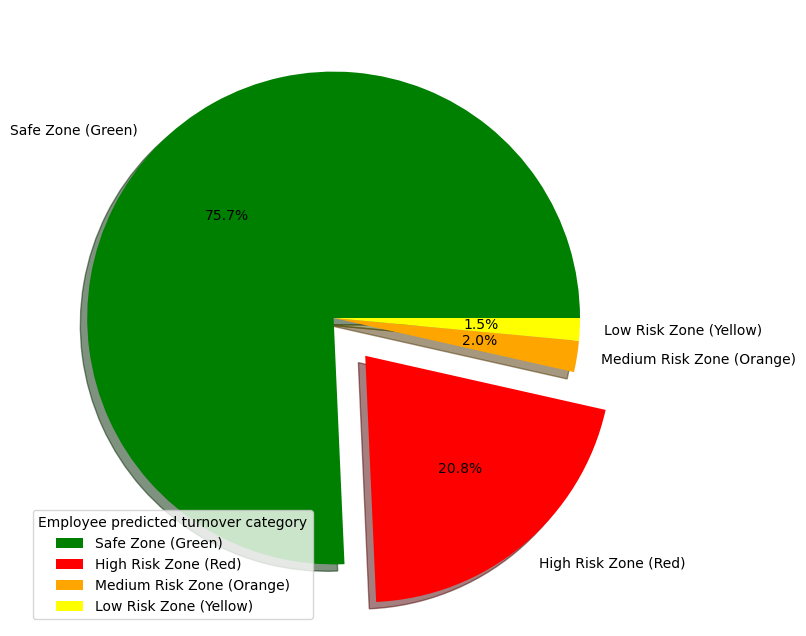

In [61]:

explode_high=[0,0.2,0,0]

plt.figure(figsize=(10,8))
plt.pie(predicted_category.values,labels=predicted_category.index,explode=explode_high,shadow=True, colors=['Green', 'Red','Orange','Yellow'], autopct='%1.1f%%')
plt.legend(title='Employee predicted turnover category', loc='lower left')
plt.show()

By looking the above chart we can conclude that there are 21.1% of the total employee who are in the High risk zone which means that they might leave the company at any time.
The company should look into all employee case properly making the high risk zone employees priority.